## Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-ham.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

## Load The Data

In [3]:
# Features 
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities 
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

# Calculating Joint  Probability

## The Dot Product

In [4]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [5]:
a.dot(b)

22

In [6]:
1 * 0 + 2 * 5 + 3 * 4

22

In [7]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c is', c.shape)
print(c)

shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [8]:
print(a.dot(c))
print('shape of dot product is', a.dot(c).shape)

[21  9]
shape of dot product is (2,)


In [9]:
[1*0 + 2*3 + 3*5, 1*6 + 2*0 + 3*1]

[21, 9]

In [10]:
X_test.shape

(1725, 2500)

In [11]:
prob_token_spam.shape

(2500,)

In [12]:
print('shape of dot product is ', X_test.dot(prob_token_spam).shape)

shape of dot product is  (1725,)


## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam) } {P(X)}$$

In [13]:
PROB_SPAM = 0.31

In [14]:
np.log(prob_token_spam)

array([ -4.49025397,  -5.27411487,  -4.97097426, ..., -12.19281009,
       -11.0941978 ,  -8.7916127 ])

## Joint Probability in log format

In [15]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [16]:
joint_log_spam[:5]

array([18.31738006,  0.69705472, 15.91312028, 16.45279467, 19.48950814])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \,(1 - P(Spam)) } {P(X)}$$

In [17]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

In [18]:
joint_log_ham[:5]

array([-57.04187222, -10.7358373 , -33.0507516 , -60.93736317,
       -53.37331143])

# Making Predictions
<br>

## Checking for higher joint probability
<br>
$$P(spam \, | \, x) \, > \, P(Ham \, | \, x)$$
<br>
<center>**OR**</center>
<br>
$$P(spam \, | \, x) \, < \, P(Ham \, | \, x)$$

In [19]:
prediction = joint_log_spam > joint_log_ham

In [20]:
prediction[-5:]

array([False, False, False, False, False])

In [21]:
y_test[:5]

array([1., 1., 1., 1., 1.])

## Simplify
<br>
$$P(Spam \, | \, X) \, P(Spam) != \frac{P(X \, | \, Spam \,) \, P(Spam) } {P(X)}$$

In [22]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# Metrics And Evaluation
<br>

## Accuracy

In [23]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly:', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly:', numdocs_wrong)

Docs classified correctly: 1676
Docs classified incorrectly: 49


In [24]:
# Accuracy

correct_docs/len(X_test)

0.9715942028985507

In [25]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.84%
Accuracy of the model is 97.16%


## Visualising the Results

In [26]:
# Chart Styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | NonSpam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

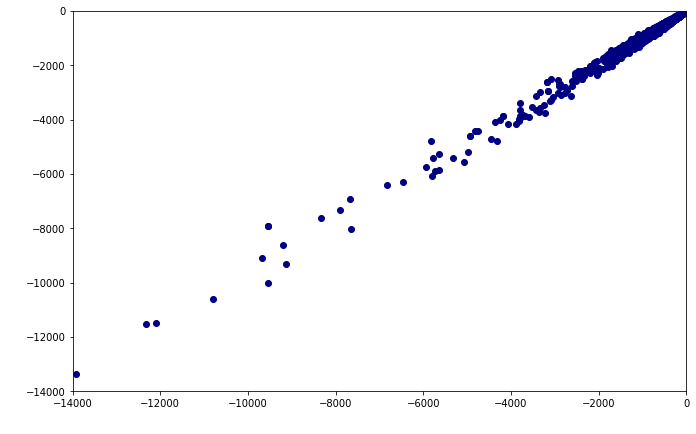

In [27]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14, color='white')
plt.ylabel(yaxis_label, fontsize=14, color='white')

# Set Scale 
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

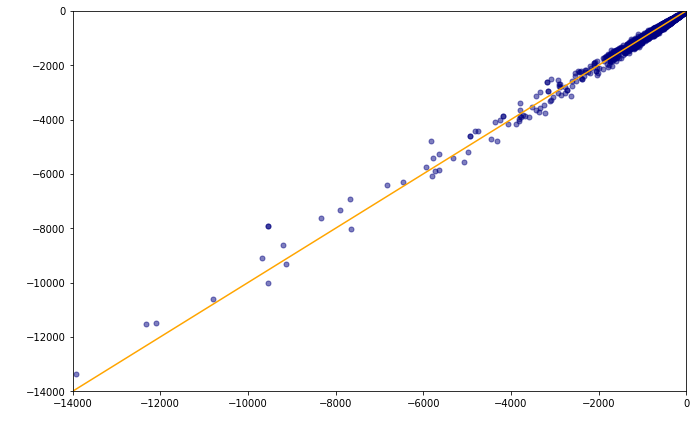

In [28]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14, color='white')
plt.ylabel(yaxis_label, fontsize=14, color='white')

# Set Scale 
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')
plt.show()

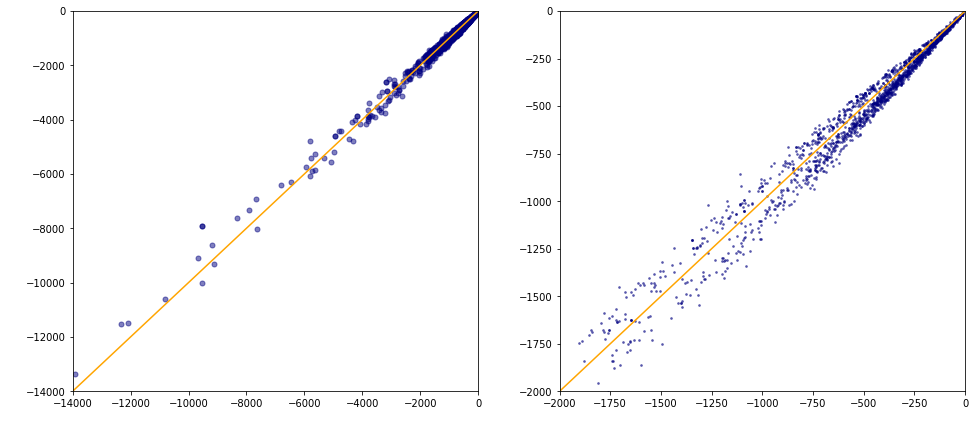

In [29]:
plt.figure(figsize=(16, 7))

# Chart No.1

plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14, color='white')
plt.ylabel(yaxis_label, fontsize=14, color='white')

# Set Scale 
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart No 2

plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14, color='white')
plt.ylabel(yaxis_label, fontsize=14, color='white')

# Set Scale 
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [30]:
# Chart Styling

sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

In [31]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
           scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'NonSpam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

TypeError: lmplot() got an unexpected keyword argument 'size'

In [ ]:
my_colors = ['#F6A7B8', '#8CABD9']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
           scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'NonSpam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

## False Positives and False Negatives

In [ ]:
np.unique(prediction, return_counts=True)

In [ ]:
true_pos = (y_test == 1) & (prediction == 1) # False Positives 

In [ ]:
true_pos.sum()

In [ ]:
true_pos

In [ ]:
false_pos = (y_test == 0) & (prediction == 1)
false_neg = (y_test == 1) & (prediction == 0)

In [ ]:
false_pos.sum()

In [ ]:
false_neg.sum()

## Recall Score

<br>

$$Recall Score = \frac{True Positives} {True Positives + False Negatives}$$

In [ ]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.3}'.format(recall_score))

## Precision Score

<br>

$$Precision Score = \frac{True Positives} {True Positives + False Positives}$$

In [ ]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

## F-Score or F1 Score

In [ ]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))